<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/CNN-TransferLearning-Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**
ROBERT A, SLOAN

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


PROBLEM STATEMENT:

CONTEXT: Computer Vision has use cases across almost all domains, from self-driving and evaluating the driver's experience in more automated and self-driving vehicles to the customer service industry across many types of jobs. The objective here is to build a range of different CNNs and test them to see what architecture works best for the problem of taking in an image and being able to recognize that A) there is a person in the image, but then also determine the emotional state of the person in the image.

Key Questions:

CNNs: Are they the right type of model for this task?

If CNNs are the right type of model, how are they constructed, and what kind of depth to the convolution layers is necessary and useful?

What is the best level of accuracy and overall performance that we can achieve before the model starts to become overfitted?

Transfer learning: How much can be gained by using pretrained models that are open-sourced? These models have been trained at no small expense on a large amount of labeled data that's time-intensive to collect and label. To reproduce them would be outside of what we are currently able to afford for the task, so can we gain from the hard work done by others, and if so, to what level?

We are trying to take in pixels from an image, value the pixel intensity, and then construct a neural network that can learn to see the world in terms of pixel values but be able to recognize the emergent features beyond that of just the pixel value. To see the human face and identify that one face has ears, and where there are ears, there is probably a face when looking at other images. Building on that to recognize the mouth and the facial features that change during different emotional states.





# To accomplish this task we need the proper resources. NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2   

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Feb 22 06:27:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install tensorflow
!pip install keras-tuner
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [5]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
# Library for creating data paths
import os
from IPython.display import HTML
# Library for randomly selecting data points
import random
# Library for creating and showing plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax, AdamW
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


# Import the Facial_emotion_images data set from google drive as a zip file and extract contents into the colab workspace

In [6]:
path = '/content/drive/My Drive/Deep learning/CapstoneProject/Facial_emotion_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

### **Let us load and unzip the data**

In [7]:
picture_size = 48
folder_path = "Facial_emotion_images/"

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

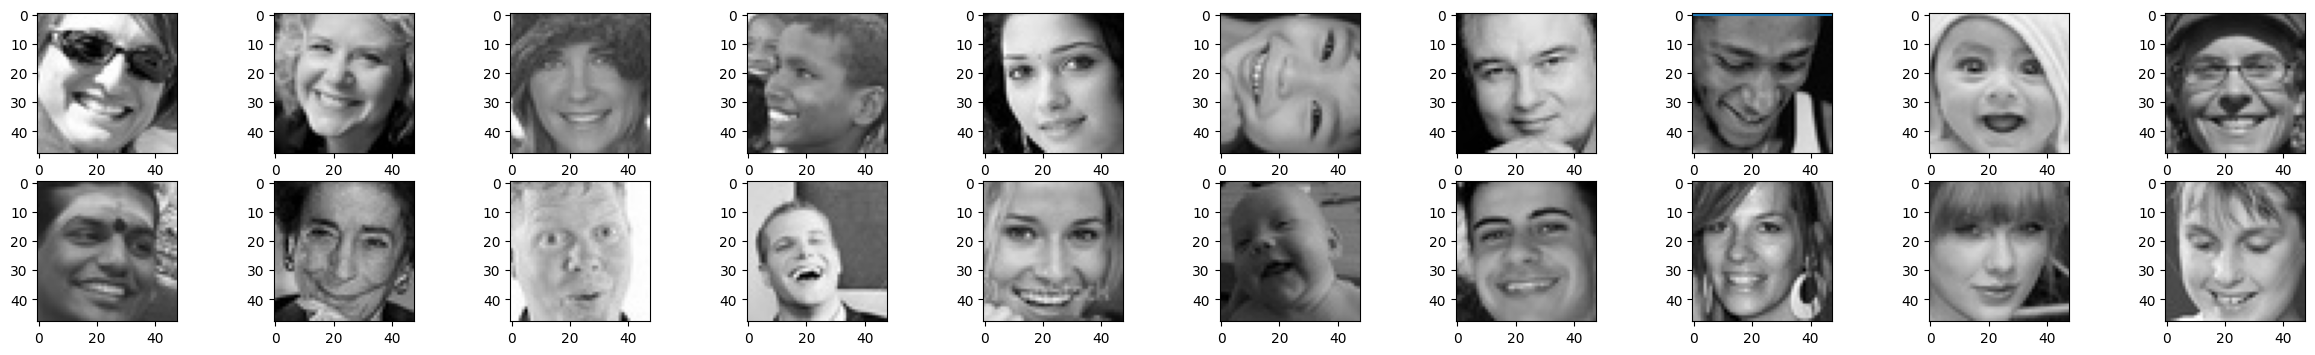

In [7]:
folder_path = 'Facial_emotion_images/'
num_happy = len(os.listdir(folder_path + "train/" + 'happy'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'happy'</b> is: <b>{num_happy}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))


expression1 = 'happy'
plt.figure(figsize= (30,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)
    img = load_img(folder_path + "train/" + expression1 + "/" +
                  os.listdir(folder_path + "train/" + expression1)[i], target_size = (picture_size, picture_size))
    # Seperate the two expressions with a horizontal line
    if i == 8:
        plt.axhline()
    plt.imshow(img)


**Observations and Insights:__**

### **Surprised**

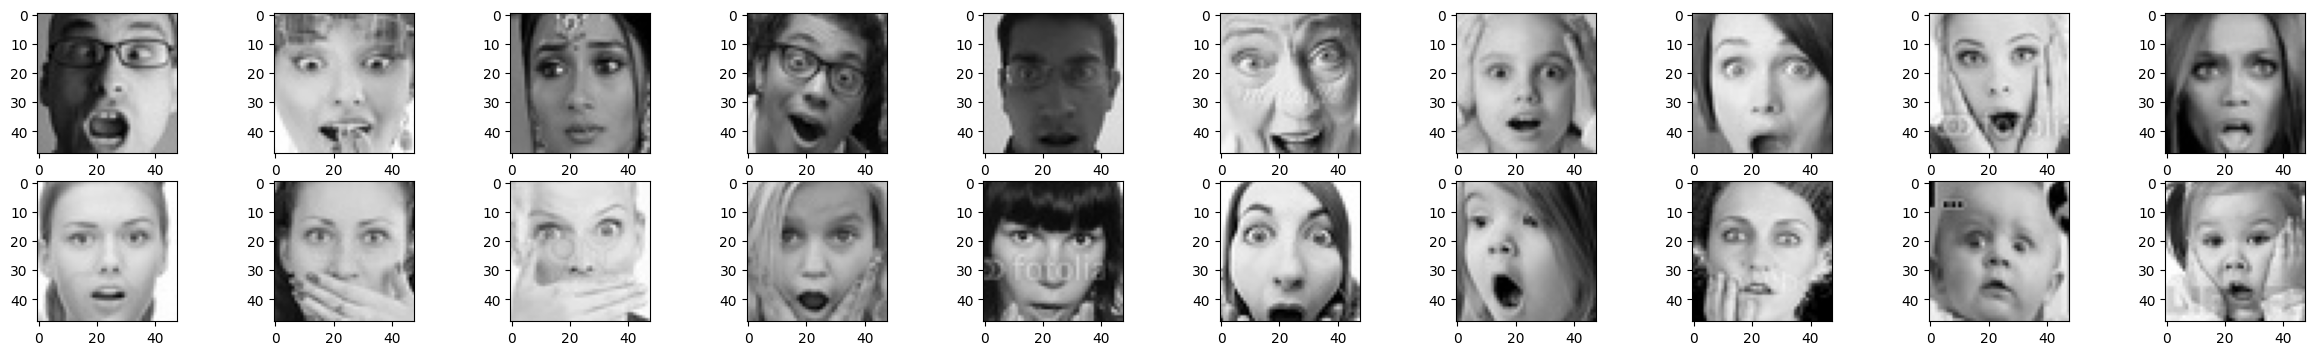

In [8]:
folder_path = 'Facial_emotion_images/'
num_surprise = len(os.listdir(folder_path + "train/" + 'surprise'))
num_happy= len(os.listdir(folder_path + "train/" + 'happy'))
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; padding: 10px;text-align: center; font-size: 25px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'surprise'</b> is: <b>{num_surprise}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))
expression = 'surprise'

plt.figure(figsize= (30
                     ,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Sad**

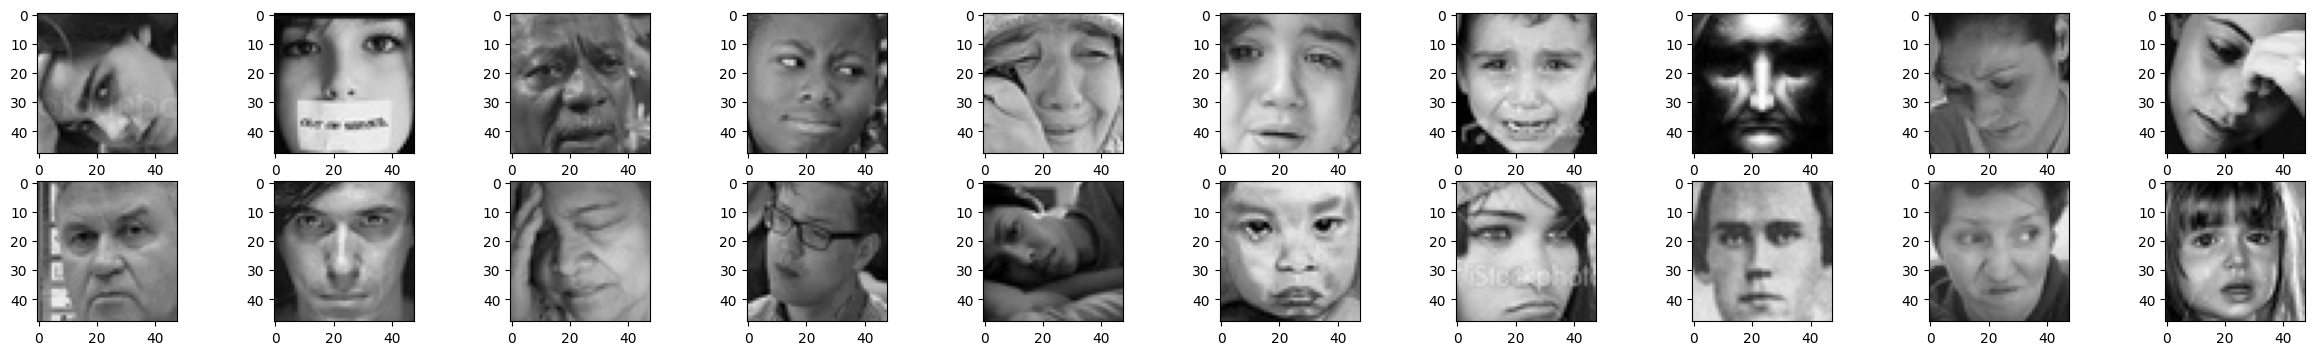

In [9]:
from IPython.display import HTML
import os

folder_path = 'Facial_emotion_images/'
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'sad'</b> is: <b>{num_sad}</b></p>" \
              f"</div>"

display(HTML(output_html))
expression = 'sad'

plt.figure(figsize= (30,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

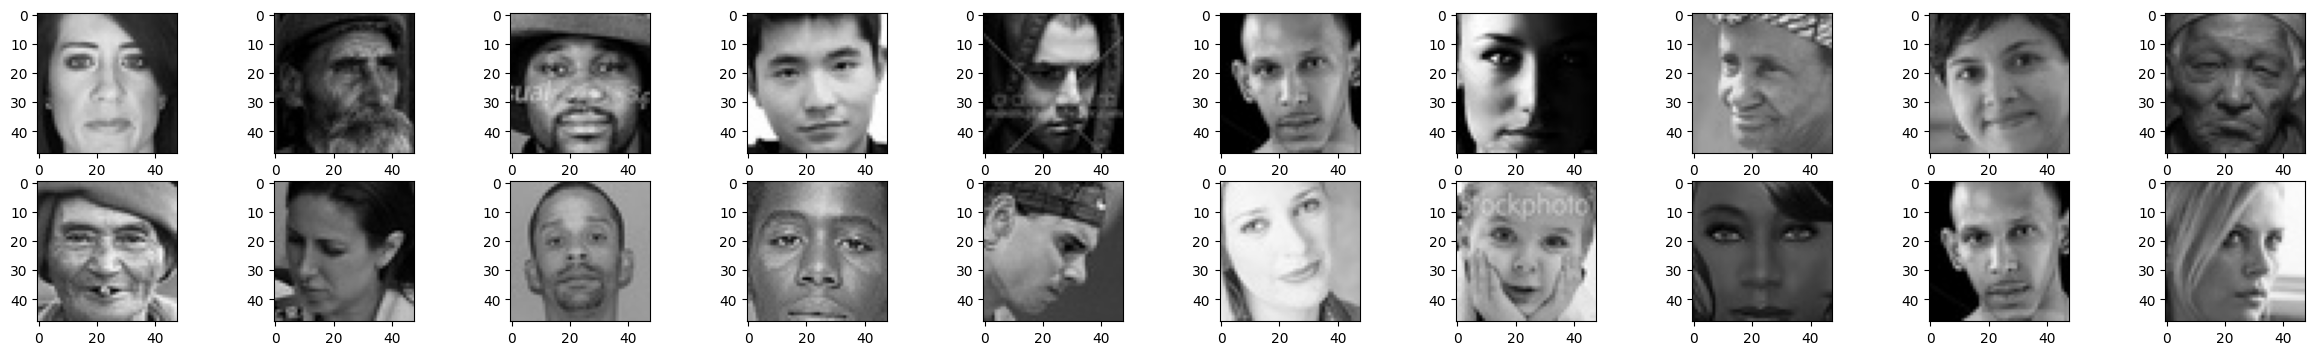

In [10]:
folder_path = 'Facial_emotion_images/'
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'neutral'</b> is: <b>{num_neutral}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))
expression = 'neutral'

plt.figure(figsize= (30,4))
for i in range(1, 21, 1):
    plt.subplot(2, 10, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

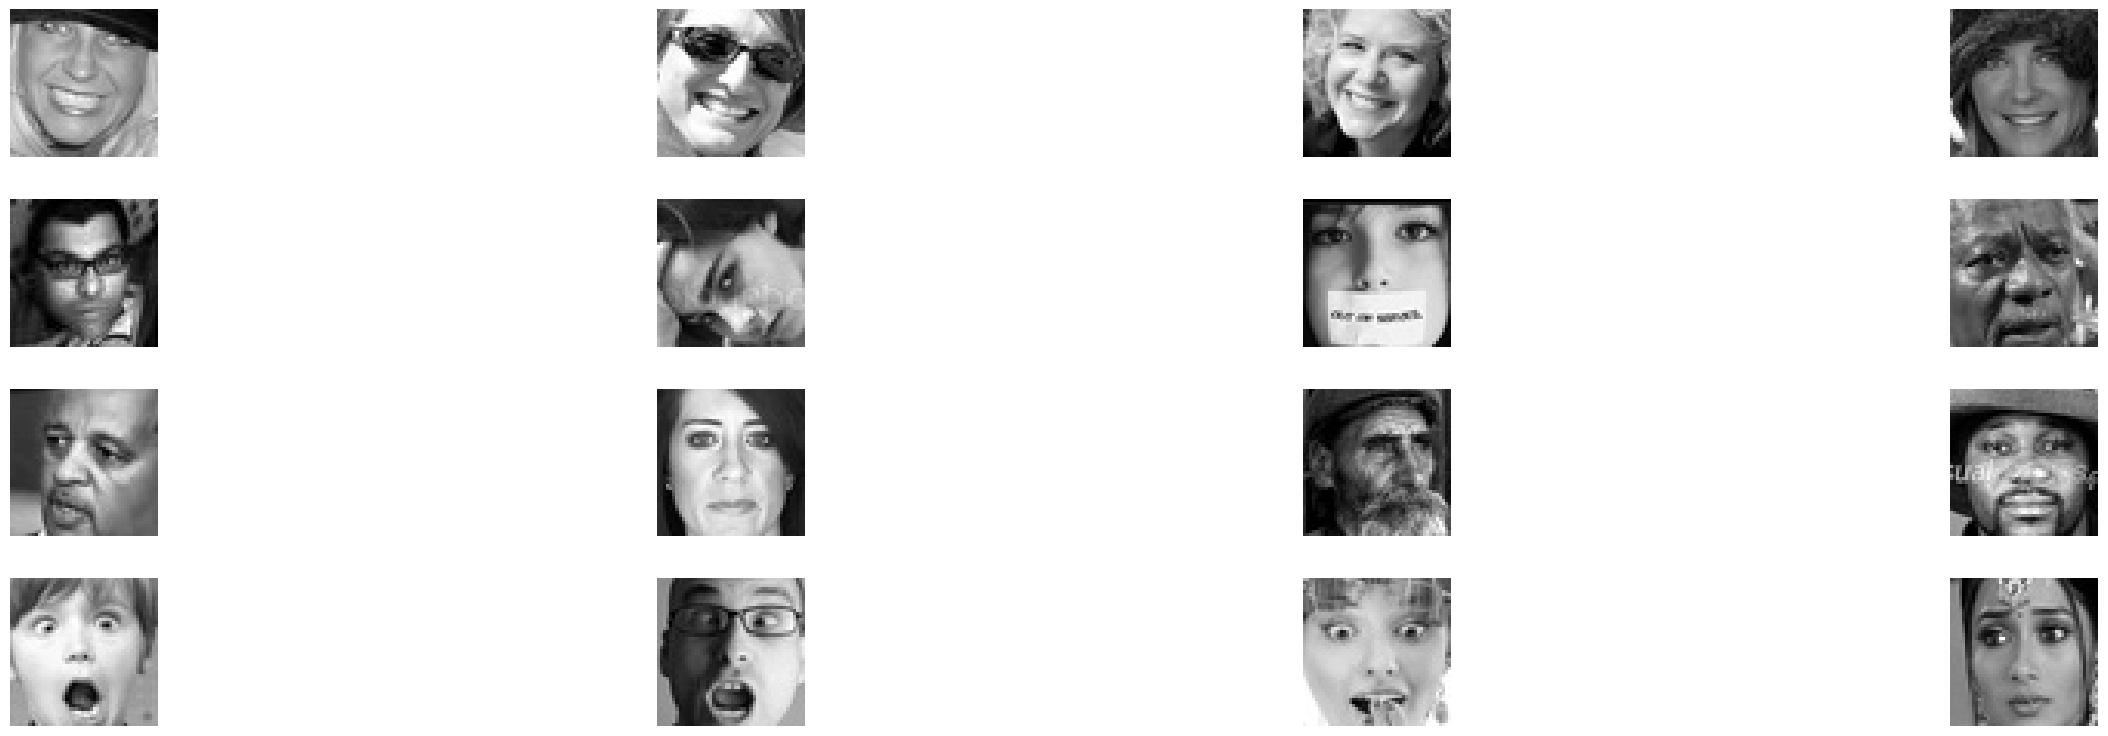

In [27]:
import os
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Assuming 'base_dir' is correctly set to your dataset directory
base_dir = 'Facial_emotion_images/train/'
categories = ['happy', 'sad', 'neutral', 'surprise']

fig, ax = plt.subplots(nrows=len(categories), ncols=4, figsize=(30, 8))  # Adjusted figsize for better visibility

for i, category in enumerate(categories):
    category_dir = os.path.join(base_dir, category)
    sample_images = os.listdir(category_dir)[:4]  # Get first 4 images of each category
    for j, image in enumerate(sample_images):
        img_path = os.path.join(category_dir, image)
        img = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        if j == 0:  # Mark the category name more prominently
            ax[i, j].set_ylabel(category.capitalize(), fontsize=14, labelpad=10, color='blue')

# Enhance layout and visibility
plt.tight_layout(pad=3.0)
plt.show()


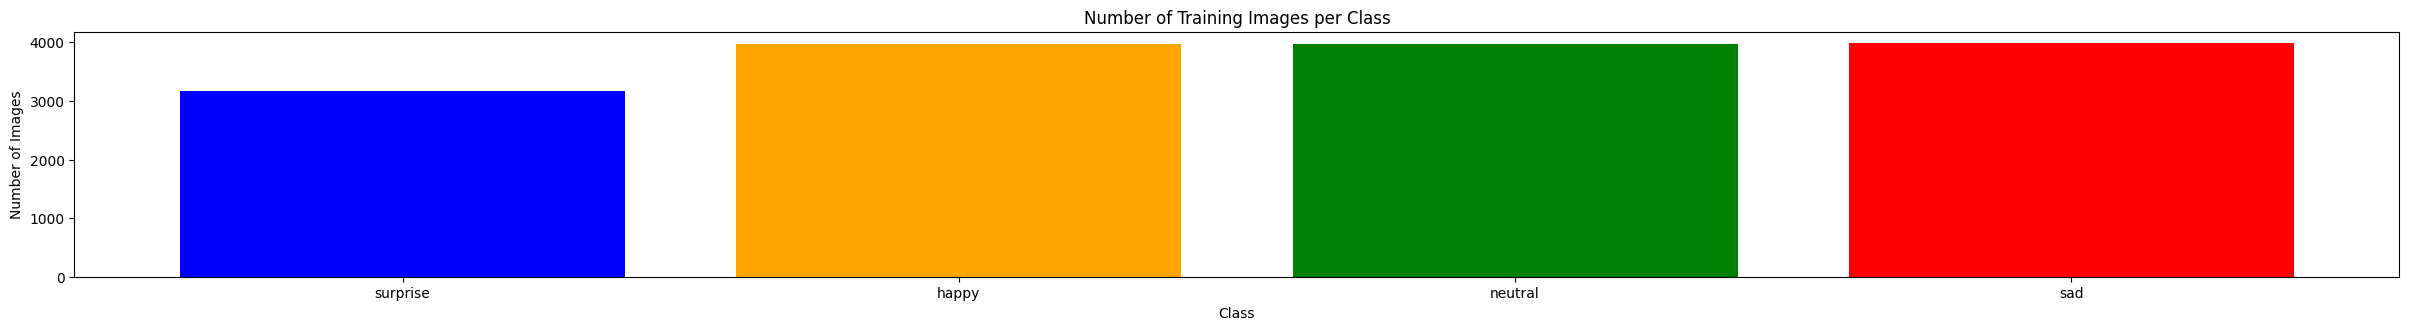

In [26]:
folder_path = 'Facial_emotion_images/'
num_surprise = len(os.listdir(folder_path + "train/" + 'surprise'))
num_happy= len(os.listdir(folder_path + "train/" + 'happy'))
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))

# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; padding: 10px;text-align: center; font-size: 25px; border-radius: 10px;'>" \
              f"<h3 style='color: #333;'>Training Data Information:</h3>" \
              f"<p style='color: blue;'>Number of training images for class <b>'surprise'</b> is: <b>{num_surprise}</b></p>" \
              f"<p style='color: green;'>Number of training images for class <b>'neutral'</b> is: <b>{num_neutral}</b></p>" \
              f"<p style='color: orange;'>Number of training images for class <b>'happy'</b> is: <b>{num_happy}</b></p>" \
              f"<p style='color: red;'>Number of training images for class <b>'sad'</b> is: <b>{num_sad}</b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))
# Code to plot histogram
plt.figure(figsize = (30, 7))


# Data
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]

%matplotlib inline

plt.subplot(2, 1, 1),

plt.bar(classes, num_images, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Training Images per Class')
plt.show()

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

OBSERVATION: The categorys sad neutral and happy all have the same ammount of images however the suprise category has less.


**Observations and Insights:__**

The data set is skewed and needs to have some data augmentation methods applied to equalize the data set.

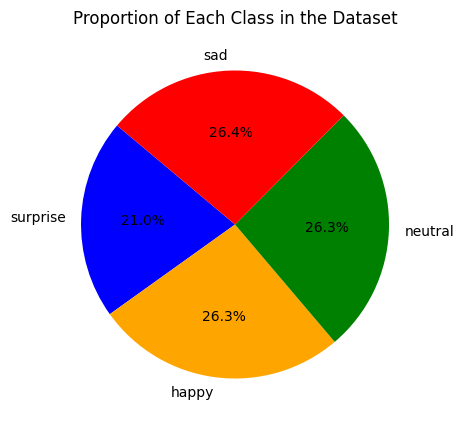

In [25]:
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]
plt.figure(figsize=(5, 5))

plt.pie(num_images, labels=classes, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Proportion of Each Class in the Dataset')
plt.show()
# Check the Data Set for imbalance
min_class_size = min(num_images)
max_class_size = max(num_images)
imbalance_ratio = max_class_size / min_class_size

import matplotlib.pyplot as plt

# Data
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]

%matplotlib inline


# Use HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<h3 style='color: red'>Imbalance Ratio: Categorical representation in the data set (Max Class Size / Min Class Size): 1.25 :</h3>" \
              f"<p style='color: #666;'><b>''</b>Imbalance Ratio between classes is:  <b>{imbalance_ratio:.2f}</b></p>" \
              f"<p style='color: red;'><b>''</b> Sad image representation is: <b> 26.4% </b></p>" \
              f"<p style='color: green;'><b>''</b>Neutral image representation is: <b> 26.3% </b></p>" \
              f"<p style='color: orange;'><b>''</b> Happy image representation is: <b> 26.3% </b></p>" \
              f"<p style='color: blue;'><b>''</b>Surprise image representation is: <b> 21.0% </b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))


In the initial EDA of the dataset, the categories of emotions appeared to be balanced except for 'surprise'. Digging into the statistical significance of the disparity, I have concluded the following

An imbalance ratio of 1.25 (Max Class Size / Min Class Size) suggests a relatively mild imbalance among the classes in the dataset.

**Impact of Mild Imbalance**
Model Performance: **Model Performance** Modern neural networks, particularly those used for image classification tasks (like CNNs), are quite robust to mild class imbalances. An imbalance ratio close to 1 indicates that the classes are fairly well represented.

**Learning Dynamics**: The slight imbalance might not significantly skew the learning process, meaning the model can still learn to generalize well across all classes without heavy reliance on data balancing techniques.

To make sure that the mild inbalance is not going to impact the training process the following steps have been employed in the following models traing.
** Monitor Class-specific Metrics: **Even with a mild imbalance,** monitoring metrics like precision, recall, and F1-score** for each class is good practice. This ensures that all classes are correctly learned by the model, and no class is systematically favored or ignored.

**Mild Data Augmentation:** While aggressive oversampling or synthetic data generation might not be necessary, employing data augmentation techniques  rotation, flipping, scaling on the training set, can further help handle the slight imbalance's impact.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Define image size and paths
picture_size = 48
base_path = "Facial_emotion_images/"

train_path = base_path + "train/"
validation_path = base_path + "validation/"
test_path = base_path + "test/"

# Initialize the data generator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

# For validation and test sets, usually only rescaling is applied
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order for evaluation
)

# Getting the total Training images, Testing images and Validation images.
traingen = train_generator.n
testgen = test_generator.n
validationgen = validation_generator.n
# Using inline HTML to style the output
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 25px; padding: 10px; border-radius: 10px;'>" \
              f"<p style='color: red;'><b>''</b>Total Training Images <b> {traingen}</b></p>" \
              f"<p style='color: black;'><b>''</b>Total Testing Images <b> {validationgen} </b></p>" \
              f"<p style='color: blue;'><b>'Data Set'</b>Total Validation Images <b>{testgen} </b></p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# Defining the function for creating the custom classification report


In [10]:
#Defining the function for creating the custom classification report


def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

# Total Images in the categories and creating a weighted ouput for each emotion

In [14]:
import os
from IPython.display import HTML, display

base_path = "Facial_emotion_images/"
subsets = ['train', 'test', 'validation']
classes = ['happy', 'sad', 'neutral', 'surprise']

# Initialize a dictionary to hold the count of each subset
subset_counts = {subset: 0 for subset in subsets}

for subset in subsets:
    for emotion in classes:
        # Construct path to each class directory
        dir_path = os.path.join(base_path, subset, emotion)
        # Count files in directories and add to subset count
        if os.path.exists(dir_path):
            files_count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
            subset_counts[subset] += files_count

# Assuming 'train' corresponds to Total Training Images, 'test' to Total Testing Images, and 'validation' to Total Validation Images
output_html = f"<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 10px; border-radius: 10px;'>" \
              f"<p style='color: red;'><b>Total Training Images:</b> {subset_counts['train']}</p>" \
              f"<p style='color: black;'><b>Total Testing Images:</b> {subset_counts['test']} </p>" \
              f"<p style='color: blue;'><b>Total Validation Images:</b> {subset_counts['validation']} </p>" \
              f"</div>"

# Display the styled output
display(HTML(output_html))


In [13]:
import os
from IPython.display import HTML, display

base_path = "Facial_emotion_images/"
subsets = ['train', 'test', 'validation']
classes = ['happy', 'sad', 'neutral', 'surprise']

# Initialize a dictionary to hold the count of each class
class_counts = {emotion: 0 for emotion in classes}

for subset in subsets:
    for emotion in classes:
        # Construct path to each class directory
        dir_path = os.path.join(base_path, subset, emotion)
        # Count files in directories
        if os.path.exists(dir_path):
            class_counts[emotion] += len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])

# Generate HTML content
output_html = "<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>"
output_html += "<h3 style='color: #333;'>Class Distribution</h3>"
for emotion, count in class_counts.items():
    output_html += f"<p style='color: #333;'><b>{emotion.capitalize()}:</b> {count}</p>"
output_html += "</div>"

# Display the styled output
display(HTML(output_html))


In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from IPython.display import HTML, display


total_samples = sum(class_counts.values())
n_classes = len(classes)

# Compute class weights using sklearn's compute_class_weight function for better accuracy

y_integers = np.array([classes.index(emotion) for emotion in class_counts.keys() for _ in range(class_counts[emotion])])
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
class_weights_dict = {classes[i]: weight for i, weight in enumerate(class_weights)}
# List the class weights in styled HTML
output_html = "<div style='background-color: #f0f0f5; text-align: center; font-size: 30px; padding: 20px; border-radius: 10px;'>"
output_html += "<h3 style='color: #333;'>Computed Class Weights</h3>"
for emotion, weight in class_weights_dict.items():
    output_html += f"<p style='color: #333;'><b>{emotion.capitalize()}:</b> {weight:.2f}</p>"
output_html += "</div>"

# Display the styled output
display(HTML(output_html))


In [16]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_labels = np.array([classes.index(cls) for cls in classes for _ in range(class_counts[cls])])
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


In [17]:
classes_sorted = sorted(classes)

class_weights_dict = {cls: weight for cls, weight in zip(classes_sorted, class_weights)}


In [18]:
# Adjusting ClassWeights to ensure proper indicies assignment
class_weights_adjusted = {train_generator.class_indices[cls]: weight for cls, weight in class_weights_dict.items()}


## **Model Building**

### **Creating the Base Neural Network**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

#CNN_MODEL_1

In [19]:
import tensorflow as tf

In [20]:
# Fixing the random seed generator to ensure random initilization numbers
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


cnn_model_1 = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Fourth Convolutional Block
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),
    (Flatten()),
    # Dense Layers
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    # Output
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

cnn_model_summary = cnn_model_1.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

### **Compiling and Training the Model**

In [ ]:
cnn_model_1.compile(optimizer=AdamW(learning_rate=0.0005),  # Adjust learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.000002)


In [ ]:
history = cnn_model_1.fit(
    train_generator,
    epochs=25,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights

)



Epoch 1/25
473/473 [==============================] - 27s 46ms/step - loss: 1.3672 - accuracy: 0.3026 - val_loss: 1.3214 - val_accuracy: 0.2648 - lr: 5.0000e-04
Epoch 2/25
473/473 [==============================] - 22s 46ms/step - loss: 1.2208 - accuracy: 0.3796 - val_loss: 1.2417 - val_accuracy: 0.3122 - lr: 5.0000e-04
Epoch 3/25
473/473 [==============================] - 22s 45ms/step - loss: 1.1498 - accuracy: 0.4201 - val_loss: 1.2578 - val_accuracy: 0.3255 - lr: 5.0000e-04
Epoch 4/25
473/473 [==============================] - 21s 45ms/step - loss: 1.1108 - accuracy: 0.4621 - val_loss: 1.1026 - val_accuracy: 0.5041 - lr: 5.0000e-04
Epoch 5/25
473/473 [==============================] - 21s 45ms/step - loss: 1.0652 - accuracy: 0.4964 - val_loss: 1.0543 - val_accuracy: 0.5188 - lr: 5.0000e-04
Epoch 6/25
473/473 [==============================] - 21s 45ms/step - loss: 0.9929 - accuracy: 0.5599 - val_loss: 0.9972 - val_accuracy: 0.5821 - lr: 5.0000e-04
Epoch 7/25
473/473 [==============

In [ ]:
cnn_model_1.save('cnn_model_1bestscores.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

!tensorflowjs_converter --input_format=keras /content/cnn_model_1bestscores.h5 /content/recallprecisionf1js


2024-02-20 00:53:00.430837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 00:53:00.430894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 00:53:00.432410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 00:53:01.465249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


4/4 [==============================] - 0s 13ms/step


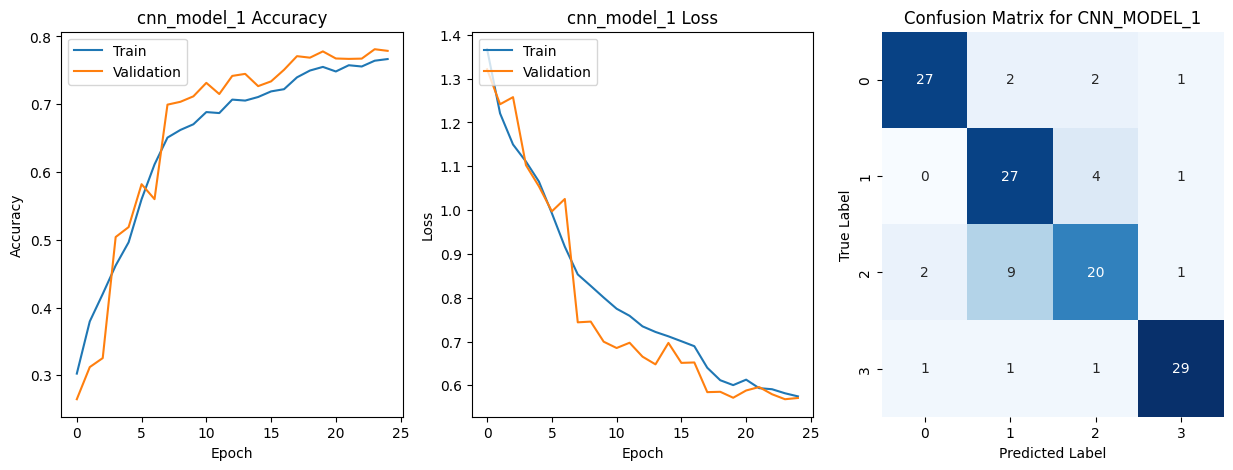

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_generator.classes, np.argmax(cnn_model_1.predict(test_generator), axis=1))
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN_MODEL_1")
plt.show()

In [ ]:
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_1.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


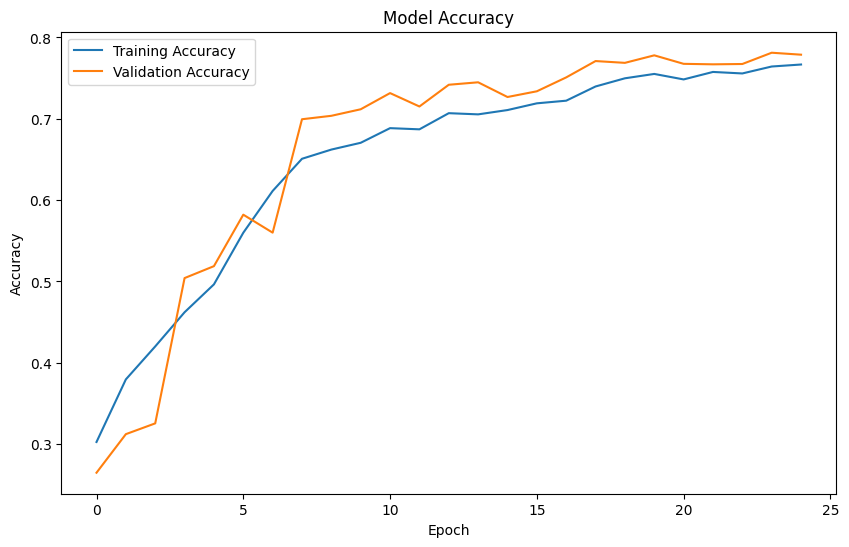

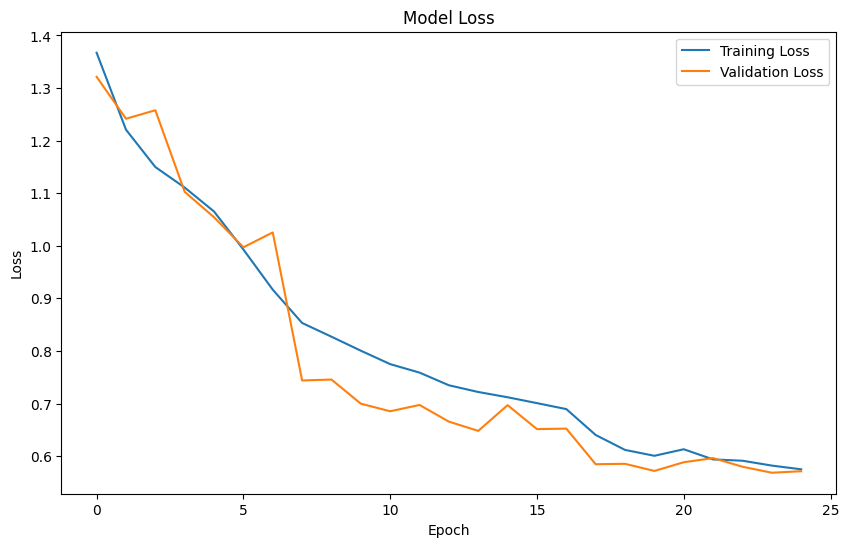

4/4 [==============================] - 0s 12ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.69      0.84      0.76        32
           2       0.74      0.62      0.68        32
           3       0.91      0.91      0.91        32

    accuracy                           0.80       128
   macro avg       0.81      0.80      0.80       128
weighted avg       0.81      0.80      0.80       128



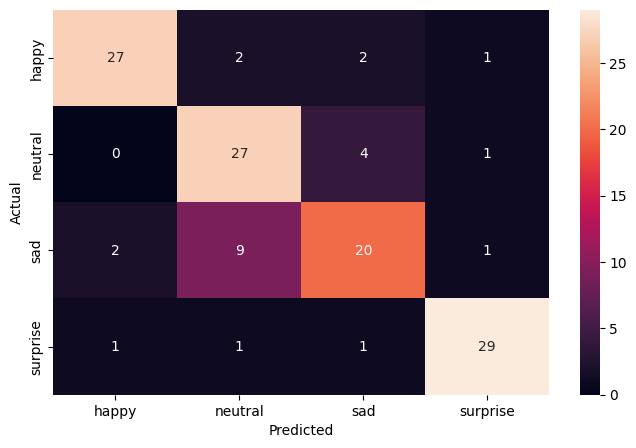

In [ ]:
# Plot the performance of cnn_model_1
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(cnn_model_1.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

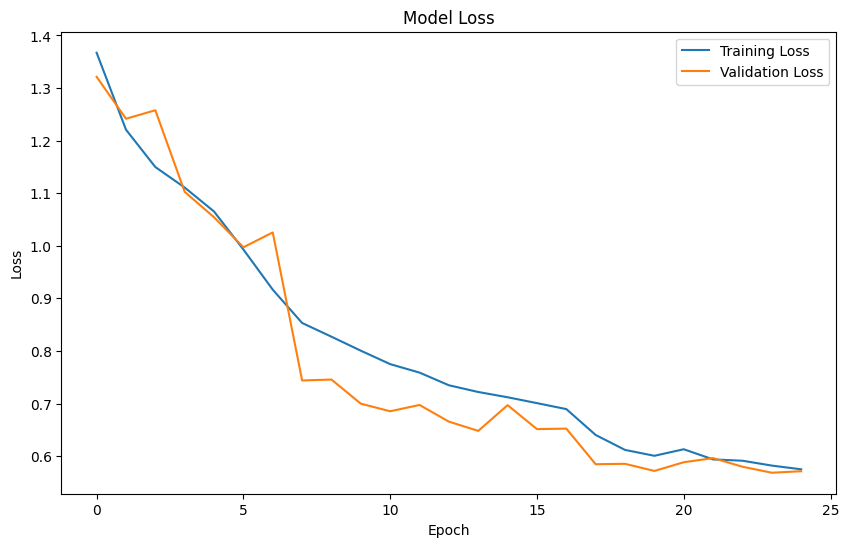

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()


# CNN_MODEL_2


- Try out a slightly larger architecture

In [22]:
# Fixing the random seed generator to ensure random initilization numbers
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Creating the second Convolutional Neural Network**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW, SGD, Adamax

# Define the CNN model
cnn_model_2 = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Slightly reduced dropout

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Adjusted dropout

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Adjusted dropout

    # Fourth Convolutional Block
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout

    # Global Average Pooling replaces Flatten to reduce parameters and potential overfitting
    GlobalAveragePooling2D(),
    Dropout(0.4),

    # Dense Fully Connected Layer
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    # Adjusted dropout down to .2
    Dense(512, activation='relu'),

    # Dense Categorical output layer
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Model Summary
cnn_model_2.summary()


cnn_model_2.compile(optimizer=Adamax(learning_rate=0.00018),  # Adjusted learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.00005)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

### **Compiling and Training the Model**

In [31]:
history = cnn_model_2.fit(
    train_generator,
    epochs=30,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_adjusted

)

Epoch 1/30
473/473 [==============================] - 34s 49ms/step - loss: 1.3896 - accuracy: 0.3073 - val_loss: 1.5718 - val_accuracy: 0.2443 - lr: 1.8000e-04
Epoch 2/30
473/473 [==============================] - 22s 46ms/step - loss: 1.3585 - accuracy: 0.3232 - val_loss: 1.4423 - val_accuracy: 0.2473 - lr: 1.8000e-04
Epoch 3/30
473/473 [==============================] - 22s 46ms/step - loss: 1.3268 - accuracy: 0.3463 - val_loss: 1.4724 - val_accuracy: 0.2620 - lr: 1.8000e-04
Epoch 4/30
473/473 [==============================] - 22s 46ms/step - loss: 1.2903 - accuracy: 0.3638 - val_loss: 1.5042 - val_accuracy: 0.3884 - lr: 1.8000e-04
Epoch 5/30
473/473 [==============================] - 22s 46ms/step - loss: 1.2217 - accuracy: 0.4127 - val_loss: 1.2773 - val_accuracy: 0.4316 - lr: 1.8000e-04
Epoch 6/30
473/473 [==============================] - 22s 46ms/step - loss: 1.1643 - accuracy: 0.4450 - val_loss: 1.0934 - val_accuracy: 0.5047 - lr: 1.8000e-04
Epoch 7/30
473/473 [==============

### **Evaluating the Model on the Test Set**

4/4 [==============================] - 0s 14ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 2 2 1 1 2 1
 2 1 0 1 1 2 1 1 1 3 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 1 1
 2 2 1 3 2 2 0 1 2 0 2 2 2 2 2 2 0 2 1 0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 0 3 2 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.76      0.69      0.72        32
           2       0.70      0.66      0.68        32
           3       0.88      0.91      0.89        32

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78      

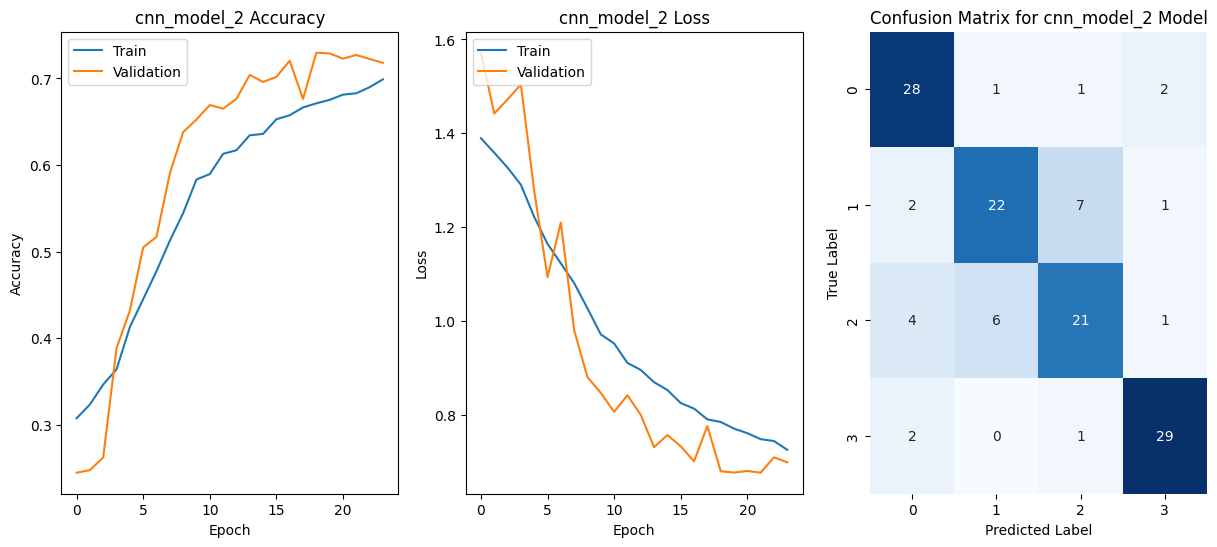

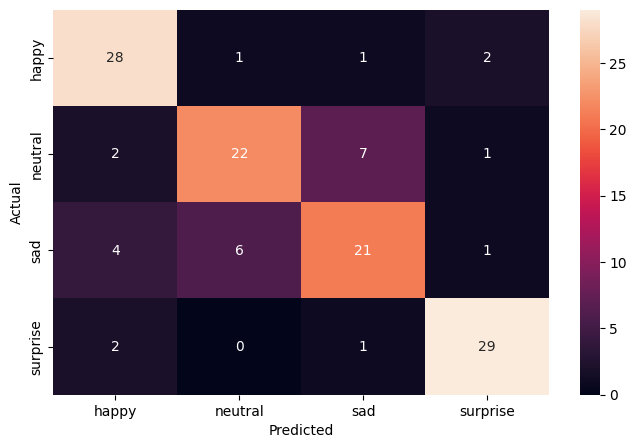

              precision    recall  f1-score   support

       happy       0.78      0.88      0.82        32
     neutral       0.76      0.69      0.72        32
         sad       0.70      0.66      0.68        32
    surprise       0.88      0.91      0.89        32

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.78      0.78      0.78       128



In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for cnn_model_2 Model")

# Display the precision recall f1-scores

# Plot the training and validation loss values
predicted_labels = np.argmax(cnn_model_2.predict(test_generator), axis=1)
print(predicted_labels)
# Get the true labels for the test set
true_labels = test_generator.classes
print(true_labels)
# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)
# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
print(classification_report(true_labels, predicted_labels, target_names=class_names_list))
plt.show()


4/4 [==============================] - 0s 13ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.76      0.69      0.72        32
           2       0.70      0.66      0.68        32
           3       0.88      0.91      0.89        32

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.78      0.78      0.78       128



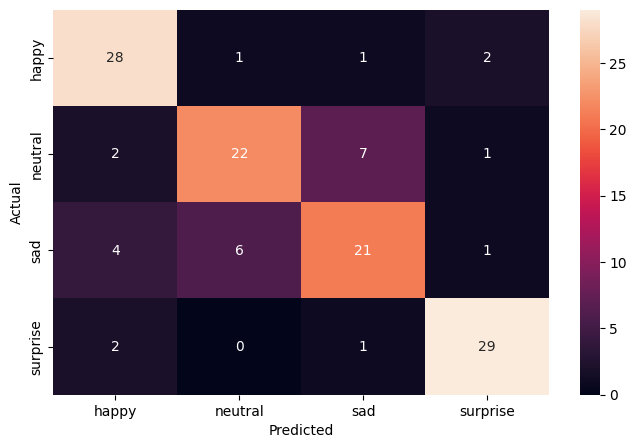

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(cnn_model_2.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

In [35]:
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_2.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


4/4 [==============================] - 0s 15ms/step - loss: 0.5748 - accuracy: 0.7812
Test Loss: 0.5747714042663574
Test Accuracy: 0.78125


In [36]:
cnn_model_2.save('cnn_model_f1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [37]:
import tensorflow as tf
import datetime

In [38]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()


**Observations and Insights:__**

While building the CNN models, i tried out various optimizers such as SGD, Adamax, AdamW, Adam, After running the model training several times with each and adjusting the learning rate along with the drop out

[link text](https://)Observations: For(cnn_model_1)

CNN MODEL 3

### **Evaluating the Model on the Test Set**

ADDITIONAL

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

In [ ]:
# Set the random seed
np.random.seed(42)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order for evaluation
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Importing the VGG16 Architecture**


### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

# **Compiling and Training the VGG16 Model_1**

In [ ]:
np.random.seed(42)

In [ ]:
samples_per_class = {
    'surprise': 3173,
    'happy': 3976,
    'neutral': 3978,
    'sad': 3982,
}

# Calculate total samples
total_samples = sum(samples_per_class.values())

# Calculate class weights
class_weights = {class_id: total_samples/(len(samples_per_class)*num_samples)
                 for class_id, num_samples in enumerate(samples_per_class.values())}

print(class_weights)


{0: 1.1904349196344153, 1: 0.9500125754527163, 2: 0.949534942182001, 3: 0.9485811150175791}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# **Compiling and Training the VGG16 Model**


In [ ]:
# Set the random seed
np.random.seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW, SGD, Adamax

# Set the random seed
np.random.seed(42)
#

# Load the VGG16 model
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Freeze all layers in the base VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Select the output of the 'block3_pool' layer
x = vgg.get_layer('block3_pool').output

# Continue adding your custom layers from here
x = Flatten()(x)  # Flatten the output of 'block3_pool'
x = Dense(512, activation='relu')(x)  # Custom dense layer
x = Dropout(0.1)(x)  # Dropout layer
x = Dense(1024, activation='relu')(x)  # Another dense layer
x = Dropout(0.2)(x)  # Dropout layer
x = Dense(32, activation='relu')(x)


# Final layer with softmax for classification
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes for emotions

# Create the final model using VGG16 input and your custom output
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.000025), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)


Epoch 1/75
473/473 [==============================] - 10s 17ms/step - loss: 1.8805 - accuracy: 0.2998 - val_loss: 1.3816 - val_accuracy: 0.2620 - lr: 2.5000e-05
Epoch 2/75
473/473 [==============================] - 8s 17ms/step - loss: 1.3644 - accuracy: 0.3341 - val_loss: 1.3035 - val_accuracy: 0.3709 - lr: 2.5000e-05
Epoch 3/75
473/473 [==============================] - 8s 16ms/step - loss: 1.2823 - accuracy: 0.4023 - val_loss: 1.2123 - val_accuracy: 0.4571 - lr: 2.5000e-05
Epoch 4/75
473/473 [==============================] - 8s 16ms/step - loss: 1.2114 - accuracy: 0.4331 - val_loss: 1.1272 - val_accuracy: 0.5120 - lr: 2.5000e-05
Epoch 5/75
473/473 [==============================] - 8s 16ms/step - loss: 1.1606 - accuracy: 0.4671 - val_loss: 1.1128 - val_accuracy: 0.5310 - lr: 2.5000e-05
Epoch 6/75
473/473 [==============================] - 8s 16ms/step - loss: 1.1103 - accuracy: 0.4885 - val_loss: 1.0563 - val_accuracy: 0.5429 - lr: 2.5000e-05
Epoch 7/75
473/473 [===================

4/4 [==============================] - 0s 11ms/step
Confusion Matrix:
[[25  6  0  1]
 [ 0 28  3  1]
 [ 3  8 18  3]
 [ 0  2  2 28]]


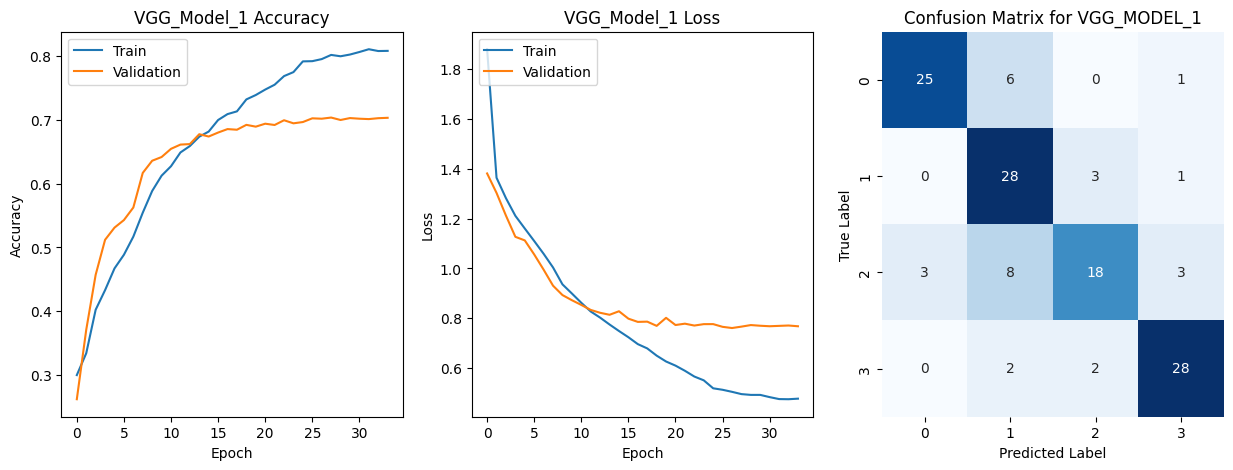

4/4 [==============================] - 0s 13ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.64      0.88      0.74        32
           2       0.78      0.56      0.65        32
           3       0.85      0.88      0.86        32

    accuracy                           0.77       128
   macro avg       0.79      0.77      0.77       128
weighted avg       0.79      0.77      0.77       128



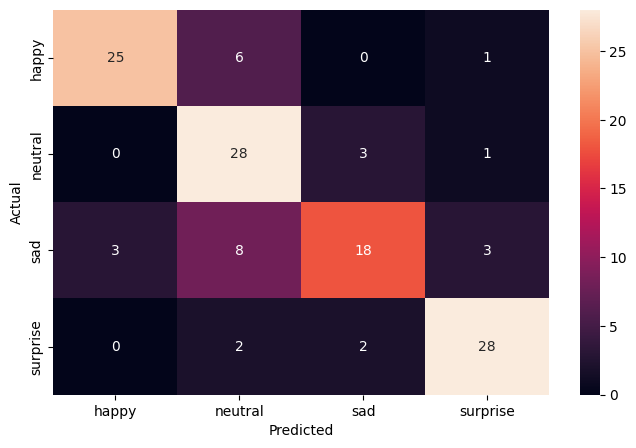

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))

# Confusion matrix
print("Confusion Matrix:")
print(cm)

# Classification report
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG_Model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG_Model_1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG_MODEL_1")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)



### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [74]:
# Set the random Seed
np.random.seed(42)

In [34]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [35]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48, 48, 3))
Resnet.summary()

171446536/171446536 [==============================] - 6s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                   

In [75]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Compiling and Training the Model**

In [81]:
np.random.seed(42)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW, SGD, Adamax
# Load ResNet50 model pre-trained on ImageNet without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)

predictions = Dense(4, activation='softmax')(x)


resnet_model2 = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
resnet_model2.compile(optimizer=Adamax(learning_rate=0.00025), loss='categorical_crossentropy', metrics=['accuracy'])



In [83]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


history = resnet_model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights_adjusted,
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)


Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.2432 - accuracy: 0.4541

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - 53s 62ms/step - loss: 1.2432 - accuracy: 0.4541 - val_loss: 148.1311 - val_accuracy: 0.2230 - lr: 2.5000e-04
Epoch 2/20
472/472 [==============================] - 27s 57ms/step - loss: 0.8767 - accuracy: 0.6330 - val_loss: 1.2080 - val_accuracy: 0.4980 - lr: 2.5000e-04
Epoch 3/20
472/472 [==============================] - 27s 57ms/step - loss: 0.6773 - accuracy: 0.7215 - val_loss: 0.8134 - val_accuracy: 0.6853 - lr: 2.5000e-04
Epoch 4/20
472/472 [==============================] - 26s 55ms/step - loss: 0.5270 - accuracy: 0.7853 - val_loss: 0.8374 - val_accuracy: 0.6808 - lr: 2.5000e-04
Epoch 5/20
472/472 [==============================] - 27s 58ms/step - loss: 0.3790 - accuracy: 0.8498 - val_loss: 0.8913 - val_accuracy: 0.7121 - lr: 2.5000e-04
Epoch 6/20
472/472 [==============================] - 26s 55ms/step - loss: 0.2578 - accuracy: 0.9021 - val_loss: 1.2126 - val_accuracy: 0.6875 - lr: 2.5000e-04
Epoch 7/20
472/472 [=======================

### **Evaluating the ResNet Model**

4/4 [==============================] - 1s 20ms/step
Confusion Matrix:
[[26  2  2  2]
 [ 2 25  5  0]
 [ 1 12 17  2]
 [ 0  3  1 28]]


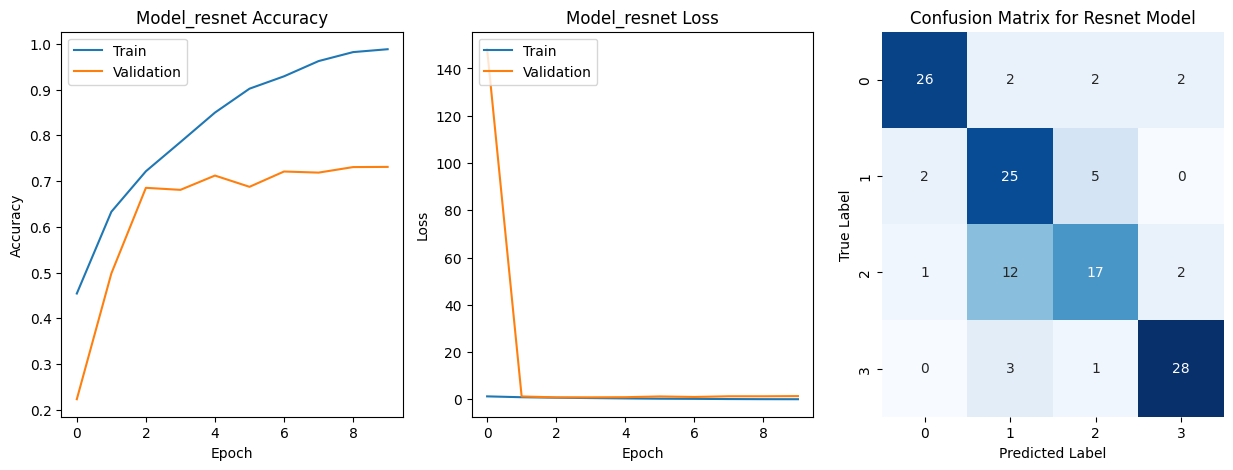

4/4 [==============================] - 0s 22ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.60      0.78      0.68        32
           2       0.68      0.53      0.60        32
           3       0.88      0.88      0.88        32

    accuracy                           0.75       128
   macro avg       0.76      0.75      0.75       128
weighted avg       0.76      0.75      0.75       128



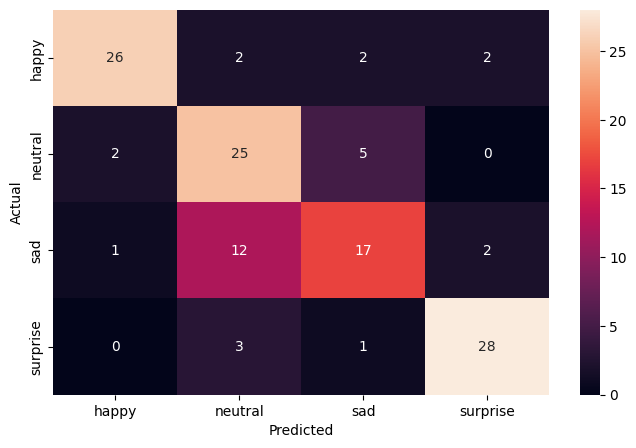

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, np.argmax(resnet_model2.predict(test_generator), axis=1))

# Confusion matrix
print("Confusion Matrix:")
print(cm)

# Classification report
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_resnet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_resnet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Resnet Model")
plt.show()

predicted_labels = np.argmax(resnet_model2.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)



In [ ]:
# Evaluate the model on the test set
val_loss, val_accuracy = resnet_model2.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [39]:
np.random.seed(42)

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import regularizers

In [41]:
import tensorflow as tf
import tensorflow.keras.applications as ap
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Compiling and Training the Model**

In [167]:
# Load EfficientNetB0 model pre-trained on ImageNet without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) # Adjusted intermediate layer
predictions = Dense(4, activation='softmax')(x)  # Adjust the number of units to match the number of classes

# Define the new model
efficient_model = Model(inputs=base_model.input, outputs=predictions)




In [176]:
efficient_model2.compile(optimizer=AdamW(learning_rate=0.000025), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


history = efficient_model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights_adjusted,
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)

Epoch 1/50
472/472 [==============================] - ETA: 0s - loss: 0.9247 - accuracy: 0.5794

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - 63s 63ms/step - loss: 0.9247 - accuracy: 0.5794 - val_loss: 0.9386 - val_accuracy: 0.5800 - lr: 2.5000e-05
Epoch 2/50
472/472 [==============================] - 27s 58ms/step - loss: 0.9242 - accuracy: 0.5820 - val_loss: 0.9778 - val_accuracy: 0.5647 - lr: 2.5000e-05
Epoch 3/50
472/472 [==============================] - 28s 58ms/step - loss: 0.9152 - accuracy: 0.5857 - val_loss: 1.2315 - val_accuracy: 0.4327 - lr: 2.5000e-05
Epoch 4/50
472/472 [==============================] - 28s 60ms/step - loss: 0.9102 - accuracy: 0.5922 - val_loss: 0.9288 - val_accuracy: 0.5871 - lr: 2.5000e-05
Epoch 5/50
472/472 [==============================] - 29s 60ms/step - loss: 0.9095 - accuracy: 0.5917 - val_loss: 0.9019 - val_accuracy: 0.5968 - lr: 2.5000e-05
Epoch 6/50
472/472 [==============================] - 27s 57ms/step - loss: 0.9118 - accuracy: 0.5892 - val_loss: 0.9952 - val_accuracy: 0.5579 - lr: 2.5000e-05
Epoch 7/50
472/472 [=========================

In [160]:
# Evaluate the model on the test set
val_loss, val_accuracy = efficient_model2.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


4/4 [==============================] - 0s 19ms/step - loss: 0.9536 - accuracy: 0.6172
Test Loss: 0.9535859227180481
Test Accuracy: 0.6171875


### **Evaluating the EfficientnetNet Model**

4/4 [==============================] - 2s 13ms/step
Confusion Matrix:
[[23  4  4  1]
 [ 2 20  7  3]
 [ 3 10 17  2]
 [ 6  6  1 19]]


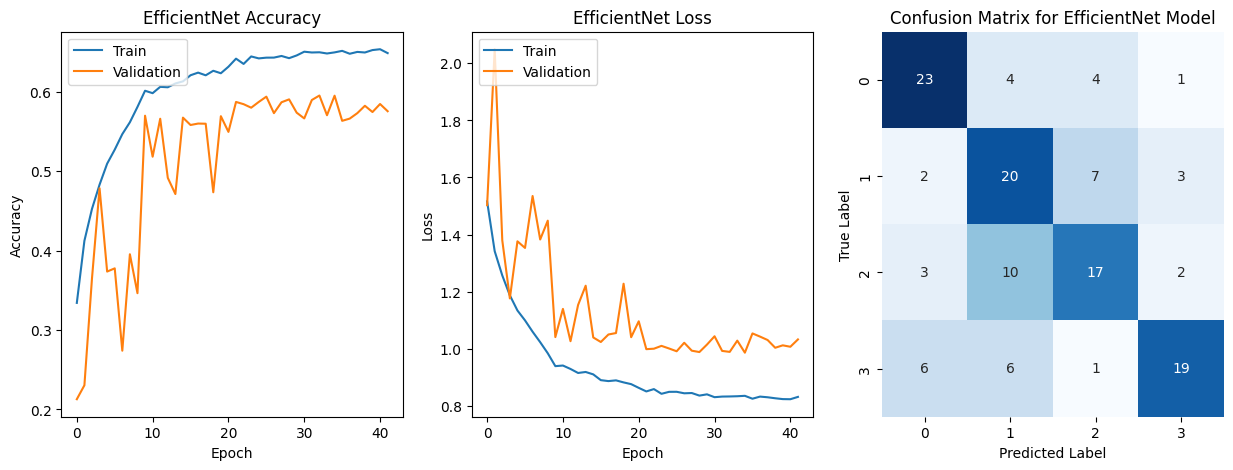

4/4 [==============================] - 0s 14ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.50      0.62      0.56        32
           2       0.59      0.53      0.56        32
           3       0.76      0.59      0.67        32

    accuracy                           0.62       128
   macro avg       0.63      0.62      0.62       128
weighted avg       0.63      0.62      0.62       128



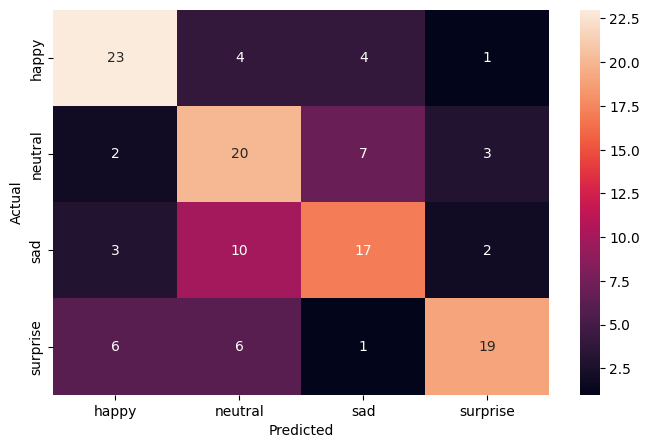

In [130]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, np.argmax(efficient_model2.predict(test_generator), axis=1))

# Confusion matrix
print("Confusion Matrix:")
print(cm)

# Classification report
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for EfficientNet Model")
plt.show()

predicted_labels = np.argmax(efficient_model2.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

**Observations and Insights:__**

# CNN Model- Chosen Model () CONFUSION MATRIX

# Transfer Learning Chosen Model (VGG16) CONFUSION MATRIX

4/4 [==============================] - 0s 11ms/step
Confusion Matrix:
[[25  6  0  1]
 [ 0 28  3  1]
 [ 3  8 18  3]
 [ 0  2  2 28]]


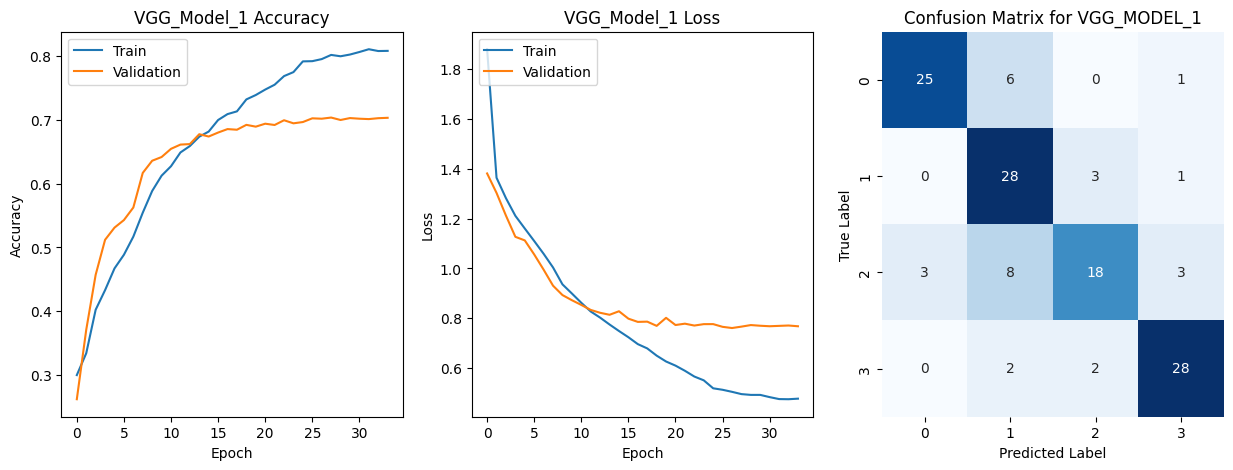

4/4 [==============================] - 0s 13ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.64      0.88      0.74        32
           2       0.78      0.56      0.65        32
           3       0.85      0.88      0.86        32

    accuracy                           0.77       128
   macro avg       0.79      0.77      0.77       128
weighted avg       0.79      0.77      0.77       128



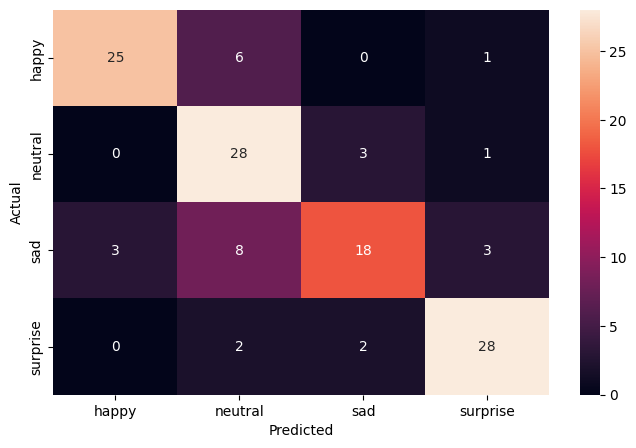

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))

# Confusion matrix
print("Confusion Matrix:")
print(cm)

# Classification report
# Plot the training and validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG_Model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG_Model_1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG_MODEL_1")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)



**Observations and Insights:__**

## **Conclusion:____________**

The goal was more nuanced then simply identifying a person in an image we aimed to detect the emotional state as well.
Convolutional Neural NEtworks have definitly proven to be the correct tool.



Accuracy vs. Overfitting:

In pursuit of optimal performance, we tread the fine line between high accuracy and the specter of overfitting. The goal is to achieve a model that not only performs well on known data but also retains its discernment when faced with new, unseen images. This balance ensures that our model genuinely understands the emotional cues, rather than memorizing specific training example

 Transfer Learning:
The strategy of employing transfer learning, wherein we utilize models pre-trained on extensive, diverse datasets, has substantially accelerated our progress. These models come with a foundational understanding of visual data, which we then fine-tune to our specific task of emotion recognition. This approach has yielded significant gains, enabling us to build upon a rich, pre-existing knowledge base without the prohibitive costs of training from scratch.

In conclusion, after many different itterations of models, there is no one size fits all great option for what model setup to use. The tool needs to fit the job at hand and depending on a large amount of variables, data sets, hyperparameters, and even limitations like time and resources. Some hand crafting of the CNN model will be required to properly approach solving a task.

With our task i will note that when i put in a 5th convolutional layer in the final CNNN i had to remove it as the feature space has been over reduced to the point that it no longer could be compiled.



Thank you: -Robert A, Sloan

## **Building a Complex Neural Network Architecture**

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [235]:
# Set the random Seed
np.random.seed(42)

In [135]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [136]:
cnn_model_4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Slightly reduced dropout

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Adjusted dropout

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Adjusted dropout

    # Fourth Convolutional Block
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout

     # Convolutional Block 5
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Keeping consistent dropout


    # Global Average Pooling replaces Flatten to reduce parameters and potential overfitting
    GlobalAveragePooling2D(),
    Flatten(),

    # Dense Layers
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),

    Dropout(0.2),
    Dense(4, activation='softmax')
])
cnn_model_4.compile(optimizer=AdamW(learning_rate=0.00003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)  # Adjusted patience


### **Compiling and Training the Model**

In [137]:
history = cnn_model_4.fit(
    train_generator,
    epochs=30,
    verbose=1,
    callbacks=[early_stopping, reduce_lr],
    validation_data=validation_generator,
    class_weight=class_weights_adjusted
)

Epoch 1/30
473/473 [==============================] - 36s 63ms/step - loss: 1.3720 - accuracy: 0.3101 - val_loss: 1.4037 - val_accuracy: 0.2331 - lr: 3.0000e-05
Epoch 2/30
473/473 [==============================] - 29s 61ms/step - loss: 1.3097 - accuracy: 0.3471 - val_loss: 1.4706 - val_accuracy: 0.2608 - lr: 3.0000e-05
Epoch 3/30
473/473 [==============================] - 29s 61ms/step - loss: 1.2124 - accuracy: 0.4128 - val_loss: 1.1717 - val_accuracy: 0.4507 - lr: 3.0000e-05
Epoch 4/30
473/473 [==============================] - 29s 61ms/step - loss: 1.1191 - accuracy: 0.4777 - val_loss: 1.1256 - val_accuracy: 0.4965 - lr: 3.0000e-05
Epoch 5/30
473/473 [==============================] - 29s 61ms/step - loss: 1.0410 - accuracy: 0.5369 - val_loss: 1.1061 - val_accuracy: 0.5439 - lr: 3.0000e-05
Epoch 6/30
473/473 [==============================] - 29s 61ms/step - loss: 0.9794 - accuracy: 0.5713 - val_loss: 1.0966 - val_accuracy: 0.5602 - lr: 3.0000e-05
Epoch 7/30
473/473 [==============

### **Evaluating the Model on Test Set**

4/4 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.74      0.72      0.73        32
           2       0.70      0.72      0.71        32
           3       0.91      0.91      0.91        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



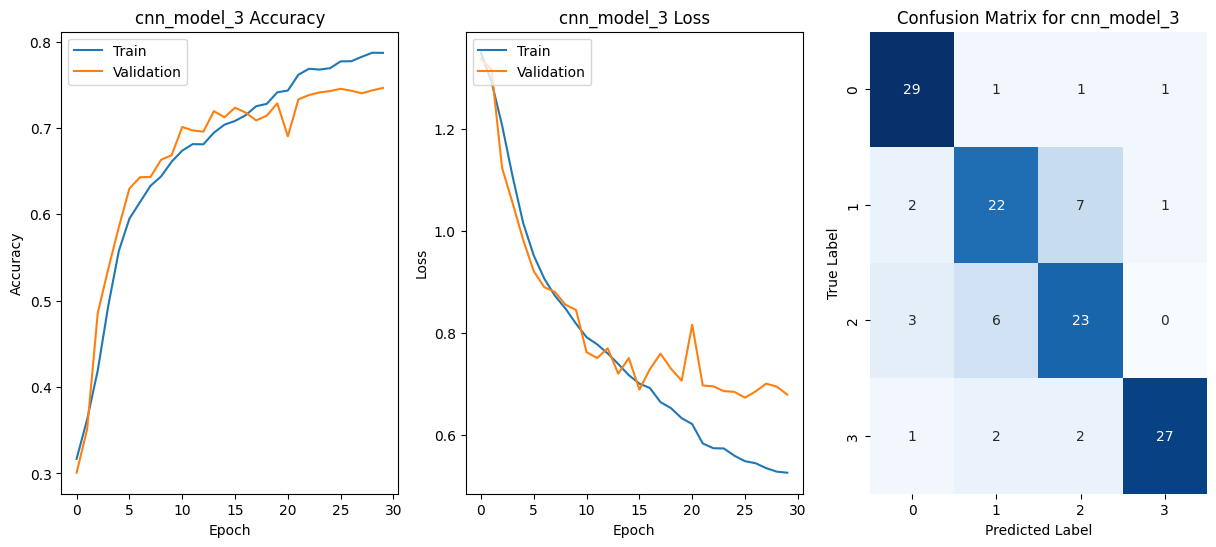

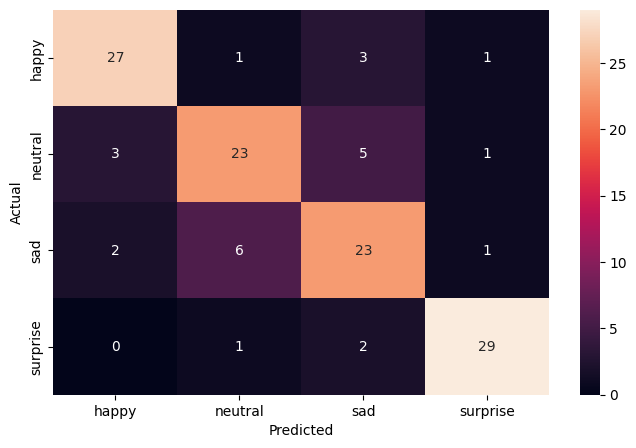

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for cnn_model_3")

# Display the precision recall f1-scores

# Plot the training and validation loss values
predicted_labels = np.argmax(cnn_model_3.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
plt.show()


4/4 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.70      0.66      0.68        32
           2       0.70      0.66      0.68        32
           3       0.90      0.81      0.85        32

    accuracy                           0.77       128
   macro avg       0.77      0.77      0.76       128
weighted avg       0.77      0.77      0.76       128



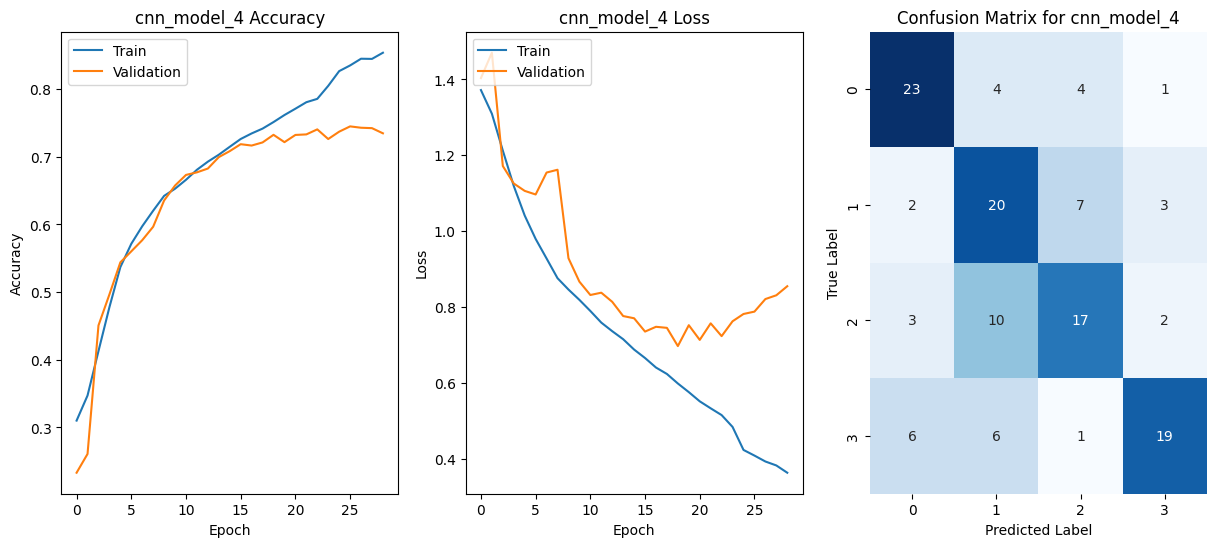

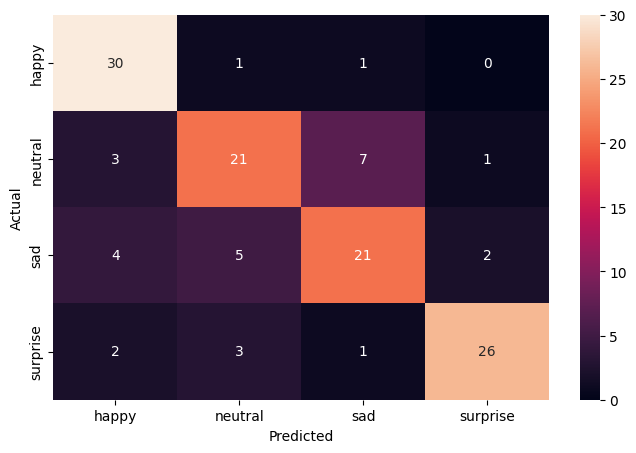

In [138]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for cnn_model_4")

# Display the precision recall f1-scores

predicted_labels = np.argmax(cnn_model_4.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
plt.show()


In [ ]:
history = cnn_model_3.fit(
    train_generator,
    epochs=30,
    verbose=1,
    callbacks=[early_stopping, reduce_lr],
    validation_data=validation_generator,
)


Epoch 1/30
473/473 [==============================] - 13s 15ms/step - loss: 1.3491 - accuracy: 0.3168 - val_loss: 1.3366 - val_accuracy: 0.3008 - lr: 3.0000e-05
Epoch 2/30
473/473 [==============================] - 7s 15ms/step - loss: 1.2925 - accuracy: 0.3626 - val_loss: 1.3163 - val_accuracy: 0.3512 - lr: 3.0000e-05
Epoch 3/30
473/473 [==============================] - 7s 16ms/step - loss: 1.2071 - accuracy: 0.4191 - val_loss: 1.1236 - val_accuracy: 0.4856 - lr: 3.0000e-05
Epoch 4/30
473/473 [==============================] - 7s 15ms/step - loss: 1.1065 - accuracy: 0.4942 - val_loss: 1.0544 - val_accuracy: 0.5369 - lr: 3.0000e-05
Epoch 5/30
473/473 [==============================] - 8s 17ms/step - loss: 1.0154 - accuracy: 0.5577 - val_loss: 0.9823 - val_accuracy: 0.5853 - lr: 3.0000e-05
Epoch 6/30
473/473 [==============================] - 8s 16ms/step - loss: 0.9518 - accuracy: 0.5949 - val_loss: 0.9211 - val_accuracy: 0.6299 - lr: 3.0000e-05
Epoch 7/30
473/473 [===================

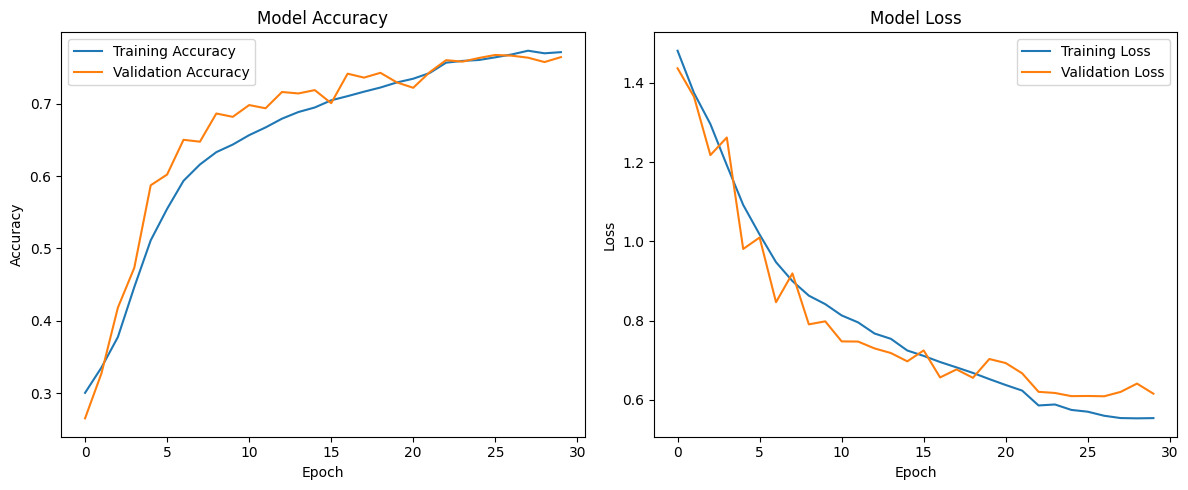

In [ ]:
import matplotlib.pyplot as plt

def plot_model_performance(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

#
plot_model_performance(history)


# Plotting the Confusion Matrix for the chosen final model**CNN_MODEL_3**
After training and evaluating All the various models that were built, CNN_MODEL_3 has the overall best performance when looking across all metrics. F1Score / Precision /Recall/ Training Accuracy and Validation Accuracy.
The confusion Matrix numbers sit at 22/32 and above for all classes. The Weighted Average and Macro Average sit at 80, while the Accuracy sits at 80 as well. Below can be found all the metrics from the CNN_MODEL_3 Run.

4/4 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.74      0.72      0.73        32
           2       0.70      0.72      0.71        32
           3       0.91      0.91      0.91        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



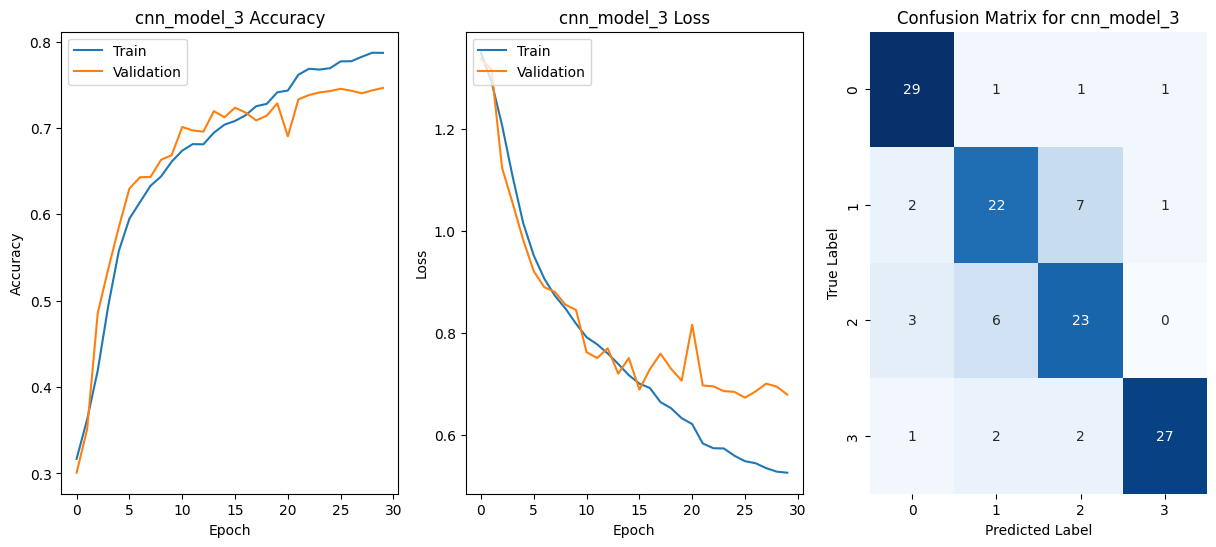

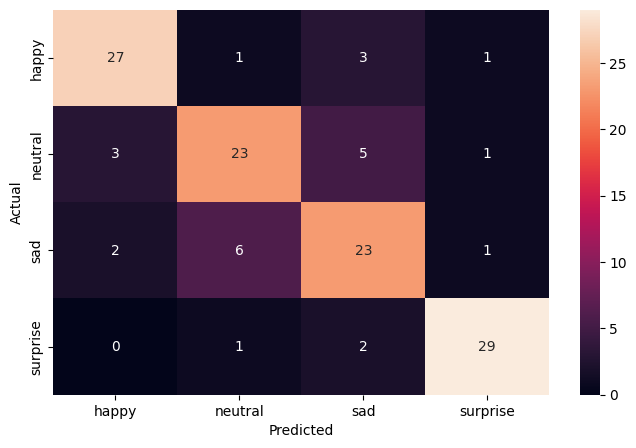

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for cnn_model_3")

# Display the precision recall f1-scores

# Plot the training and validation loss values
predicted_labels = np.argmax(cnn_model_3.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
plt.show()


4/4 [==============================] - 0s 10ms/step
dict_keys(['happy', 'neutral', 'sad', 'surprise'])
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.74      0.72      0.73        32
           2       0.70      0.72      0.71        32
           3       0.91      0.91      0.91        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



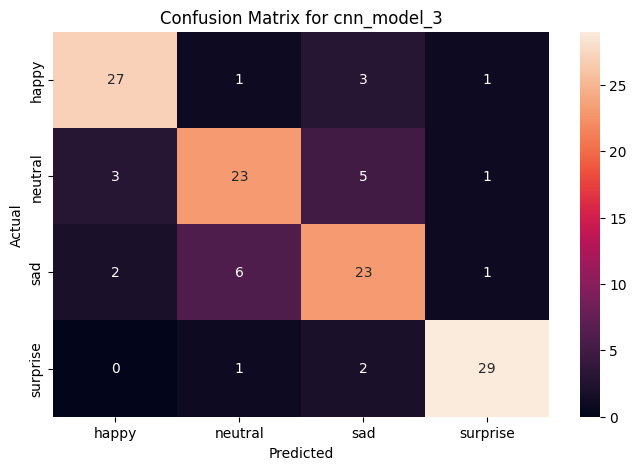

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(cnn_model_3.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()
print(class_names_list)

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)




### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

# CNN_MODEL_5 - 'SIAMESE' NETWORK-
*   To over come the dispairity in the data set, i have built a model that is trained to distinguish between similar and dissimilar image parts.
*   It is then used to perform feature extraction on the images in the pipeline

*   the Siamese network outputs the features from the last layer before the final similarity score calculation.

* Then those output feature vectors are used as the inputs to the CNN_MODEL_5

* Start with defining the input shape for our images, making sure it matches the
resolution we're working with, like (48, 48, 3) for 48x48 RGB images.

* Create the base CNN model that learns feature representations from the images. This model is crucial as it captures the essence of the images.

* Define two input tensors for the Siamese network, representing the pair of images to compare.

* Reuse the base CNN model for both inputs to ensure the feature extraction process is identical for each image in the pair.

* Process both inputs through the base CNN independently, obtaining their feature representations.
* Calculate the distance between the two sets of features to understand how similar or dissimilar the images are. The absolute difference works well for this.

* Feed the distance through a dense layer with a sigmoid activation to get a similarity score, indicating the likelihood of the images being the same class.
Compile the Siamese network, choosing an optimizer and a loss function tailored for comparison tasks, like contrastive loss.

* Prepare the image pairs for training, ensuring we have both positive pairs (same class) and negative pairs (different classes).

* Augment the dataset if needed, especially to address class imbalance or to increase the diversity of training examples.

* Train the Siamese network on these pairs, focusing on learning the subtle differences and similarities between classes.

* Evaluate the model on a separate validation set to ensure it generalizes well to new, unseen image pairs.






# This Model is trained to differentiate between similar and dissimilar image pairs, perfect for tasks requiring similarity or dissimilarity assessments. In contrast, my CNN model (cnn_model_4) is tailored for direct classification tasks across multiple categories, specifically four output classes in my case.
* Effective Leveraging of Both Models:
* Feature Extraction and Comparison:
* Siamese for Feature Vectors: I use the trained Siamese model, or specifically its base CNN part, to extract feature vectors from images. This involves modifying the Siamese network to output features from the layer just before the final similarity score calculation.

* CNN for Classification: The extracted feature vectors serve as inputs to cnn_model_4 or a similar classification model. This requires me to adjust cnn_model_4 to accept the feature vector size as its input shape, possibly changing the first layer to a Dense layer from a Conv2D, or using the features directly in a custom training loop to influence the classification decision.
Using Siamese Model for Data Augmentation:
* Balance the Dataset: I employ the Siamese model to create a more balanced training dataset by identifying similar pairs within underrepresented classes and dissimilar pairs across classes, thereby augmenting the dataset to balance class representation.
* Enhance CNN Training: cnn_model_4 is then trained on this augmented, more balanced dataset to improve its generalization ability and performance on minority classes.
* Transfer Learning:
* Feature Transfer: I utilize the base CNN from the Siamese network as a pre-trained feature extractor for cnn_model_4. This involves replacing the initial layers of cnn_model_4 with the base CNN layers from the Siamese model, and possibly freezing some or all of these layers during initial training phases.
* Fine-Tuning: After the initial training phase with some layers frozen, I consider fine-tuning the entire model (cnn_model_4 with the Siamese base CNN layers) by training it end-to-end with a very low learning rate to better adapt the pre-trained features to my specific classification task.
Practical Steps:
* Extract Base CNN from Siamese Model: If not already done, I extract the base CNN model used in the Siamese network. This model is crucial as it learns rich feature representations beneficial for both similarity assessment and classification.
* Integrate Base CNN into cnn_model_4:

# Base CNN Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.optimizers import AdamW

cnn_model_4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

cnn_model_4.compile(optimizer=AdamW(learning_rate=0.00003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l2

def create_base_cnn(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        GlobalAveragePooling2D(),

        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    ])
    return model


# Siamese Network


In [65]:
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def create_siamese_network(input_shape):
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)

    base_cnn = create_base_cnn(input_shape)

    processed_a = base_cnn(input_a)
    processed_b = base_cnn(input_b)

    distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([processed_a, processed_b])
    outputs = Dense(1, activation='sigmoid')(distance)
    model = Model(inputs=[input_a, input_b], outputs=outputs)

    return model


In [66]:
input_shape = (48, 48, 3)
base_cnn = create_base_cnn(input_shape)
feature_model = Model(inputs=base_cnn.input, outputs=base_cnn.layers[-5].output)


# Adjust based on the feature_model's output shape

In [67]:
cnn_model_4 = Sequential([
    Flatten(input_shape=base_cnn.layers[-5].output_shape[1:]),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

from tensorflow.keras.optimizers import AdamW
cnn_model_4.compile(optimizer=AdamW(learning_rate=0.00003), loss='categorical_crossentropy', metrics=['accuracy'])


#Set the Callbacks

In [68]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)


# Fitting the Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)

# Fit the model
history = cnn_model_4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,  # Adjust based on your observation of the training process
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Epoch 1/100
472/472 [==============================] - 25s 43ms/step - loss: 1.3865 - accuracy: 0.3460 - val_loss: 1.6837 - val_accuracy: 0.3663 - lr: 3.0000e-05
Epoch 2/100
472/472 [==============================] - 20s 43ms/step - loss: 1.2545 - accuracy: 0.4210 - val_loss: 1.5015 - val_accuracy: 0.3835 - lr: 3.0000e-05
Epoch 3/100
472/472 [==============================] - 20s 43ms/step - loss: 1.1560 - accuracy: 0.4819 - val_loss: 1.3127 - val_accuracy: 0.4194 - lr: 3.0000e-05
Epoch 4/100
472/472 [==============================] - 20s 43ms/step - loss: 1.0680 - accuracy: 0.5405 - val_loss: 1.1432 - val_accuracy: 0.5143 - lr: 3.0000e-05
Epoch 5/100
472/472 [==============================] - 20s 42ms/step - loss: 1.0107 - accuracy: 0.5706 - val_loss: 0.9674 - val_accuracy: 0.5817 - lr: 3.0000e-05
Epoch 6/100
472/472 [==============================] - 20s 42ms/step - loss: 0.9745 - accuracy: 0.5841 - val_loss: 1.1597 - val_accuracy: 0.5379 - lr: 3.0000e-05
Epoch 7/100
472/472 [=======

# Evaluate the model on the test set

In [149]:
# Evaluate the model on the test set
val_loss, val_accuracy = cnn_model_4.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test Loss: {val_loss}')
print(f'Test Accuracy: {val_accuracy}')


4/4 [==============================] - 0s 16ms/step - loss: 0.5081 - accuracy: 0.7969
Test Loss: 0.5081095695495605
Test Accuracy: 0.796875


4/4 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.69      0.75      0.72        32
           2       0.72      0.66      0.69        32
           3       0.97      0.88      0.92        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



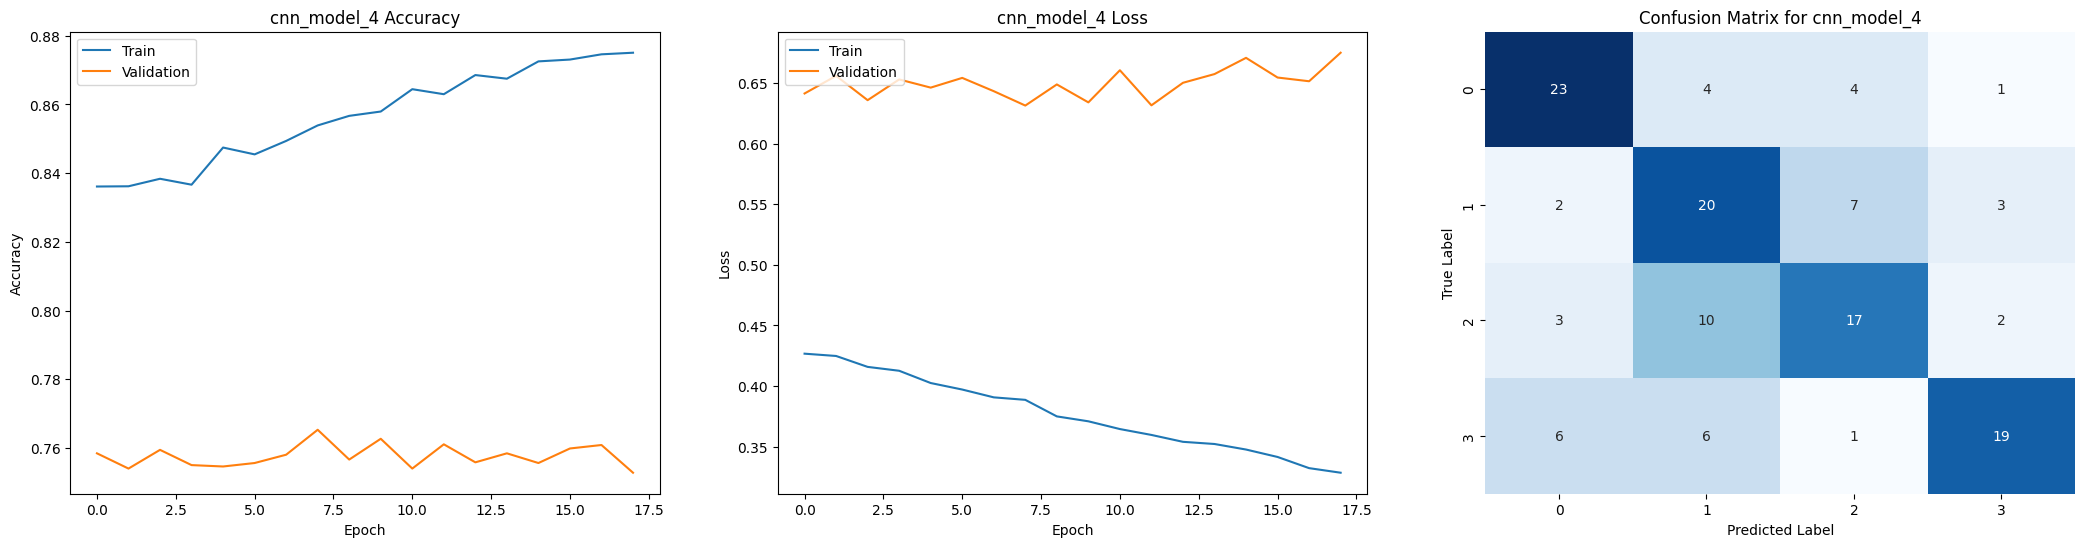

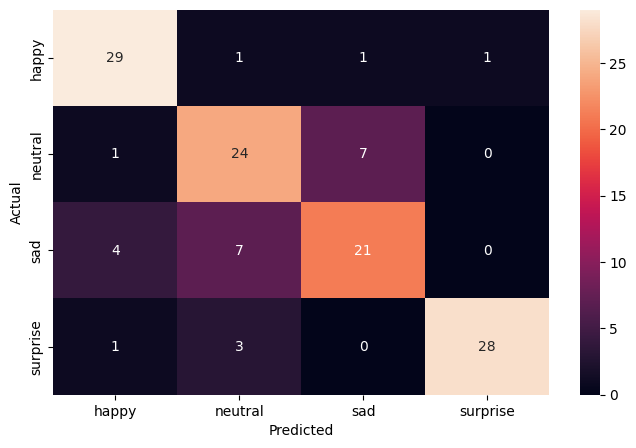

In [159]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(35, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for cnn_model_4")


# Display the precision recall f1-scores

# Plot the training and validation loss values
predicted_labels = np.argmax(cnn_model_4.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
plt.show()


In [178]:
# prompt: save cnn_model_4

cnn_model_4.save('cnn_model_4.h5')


In [182]:
!tensorflowjs_converter --input_format=keras /content/cnn_model_4.h5 /content/siamese_model_1


2024-02-22 05:12:35.043733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 05:12:35.043782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 05:12:35.044911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 05:12:36.086643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


4/4 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.69      0.75      0.72        32
           2       0.72      0.66      0.69        32
           3       0.97      0.88      0.92        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



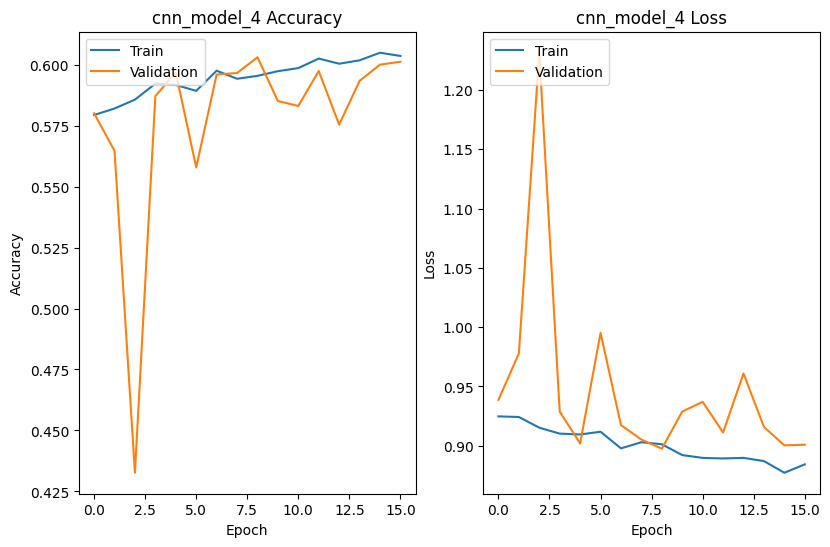

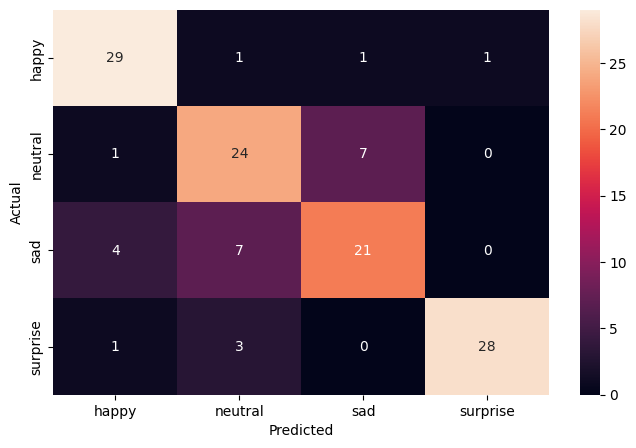

In [183]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot the training and validation accuracy values
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_model_4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values
plt.subplot(1, 4, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_model_4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss values

# Display the precision recall f1-scores

# Plot the training and validation loss values
predicted_labels = np.argmax(cnn_model_4.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
plt.show()
